[Reference](https://medium.com/@oluwatobimesh/predicting-customers-propensity-to-purchase-fcb13750d427)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/EvelynElesh/customer_propensity_modelling/main/data/training_sample.csv')

In [3]:
train.head(5)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [4]:
train.dtypes

UserID                     object
basket_icon_click           int64
basket_add_list             int64
basket_add_detail           int64
sort_by                     int64
image_picker                int64
account_page_click          int64
promo_banner_click          int64
detail_wishlist_add         int64
list_size_dropdown          int64
closed_minibasket_click     int64
checked_delivery_detail     int64
checked_returns_detail      int64
sign_in                     int64
saw_checkout                int64
saw_sizecharts              int64
saw_delivery                int64
saw_account_upgrade         int64
saw_homepage                int64
device_mobile               int64
device_computer             int64
device_tablet               int64
returning_user              int64
loc_uk                      int64
ordered                     int64
dtype: object

In [5]:
train.shape

(455401, 25)

In [6]:
print(train.describe())

       basket_icon_click  basket_add_list  basket_add_detail        sort_by  \
count      455401.000000    455401.000000      455401.000000  455401.000000   
mean            0.099150         0.074521           0.112916       0.036849   
std             0.298864         0.262617           0.316490       0.188391   
min             0.000000         0.000000           0.000000       0.000000   
25%             0.000000         0.000000           0.000000       0.000000   
50%             0.000000         0.000000           0.000000       0.000000   
75%             0.000000         0.000000           0.000000       0.000000   
max             1.000000         1.000000           1.000000       1.000000   

        image_picker  account_page_click  promo_banner_click  \
count  455401.000000       455401.000000       455401.000000   
mean        0.026735            0.003570            0.016208   
std         0.161307            0.059647            0.126274   
min         0.000000            

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

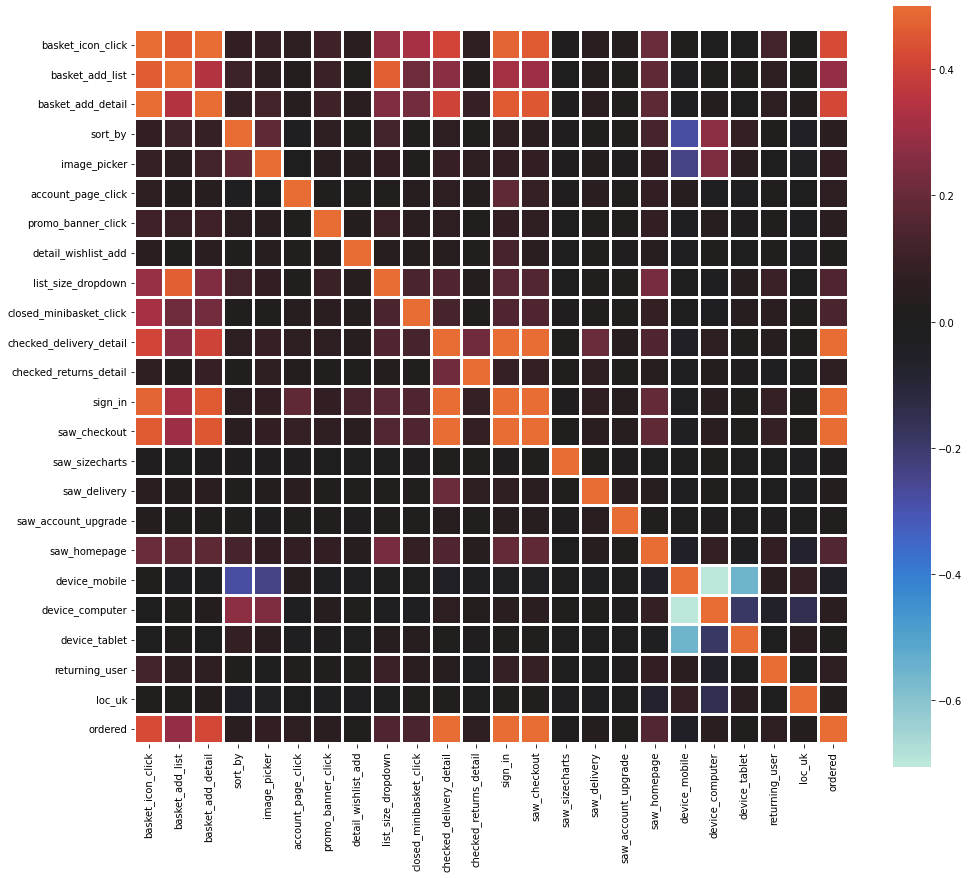

In [8]:
# To check the correlation between columns:
import seaborn as sns
corr = train.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,square=True, linewidths=2)
plt.savefig("heatmap.png")
plt.show()

In [9]:
train.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
Name: ordered, dtype: float64

In [10]:
# Drop columns with low correlation and 'ordered' as it is our target.
predictors = train.drop(['ordered','UserID','device_mobile'], axis=1)
targets = train.ordered

In [11]:
predictors.shape

(455401, 22)

In [12]:
print(predictors.columns)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_computer', 'device_tablet', 'returning_user',
       'loc_uk'],
      dtype='object')


In [13]:
# Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2)

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [15]:
lr.score(X_train,y_train)

0.9918533157663593

In [16]:
lr.score(X_test,y_test)

0.9920400522611741

In [17]:
predict = lr.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
prob = lr.predict_proba(X_test)
prob

array([[9.99992834e-01, 7.16597866e-06],
       [9.99989388e-01, 1.06118095e-05],
       [9.99995813e-01, 4.18716112e-06],
       ...,
       [9.99983736e-01, 1.62638154e-05],
       [9.99990687e-01, 9.31257857e-06],
       [9.99989142e-01, 1.08575118e-05]])

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X_train, y_train)

array([0.991889  , 0.99187527, 0.99199879, 0.99158707, 0.99201252])

In [20]:
# Now let us predict on the previous days visitors.
# First start by loading in our sample data of the previous days visitors who did not order.
yesterdays_prospect = pd.read_csv('https://raw.githubusercontent.com/EvelynElesh/customer_propensity_modelling/main/data/training_sample.csv')

In [21]:
yesterdays_prospect.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [22]:
print(yesterdays_prospect.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [23]:
print(yesterdays_prospect.head(50))

                                 UserID  basket_icon_click  basket_add_list  \
0   a720-6b732349-a720-4862-bd21-644732                  0                0   
1   a0c0-6b73247c-a0c0-4bd9-8baa-797356                  0                0   
2   86a8-6b735c67-86a8-407b-ba24-333055                  0                0   
3   6a3d-6b736346-6a3d-4085-934b-396834                  0                0   
4   b74a-6b737717-b74a-45c3-8c6a-421140                  0                1   
5   b159-6b73a0d6-b159-4728-81a6-914765                  0                0   
6   7775-6b73b976-7775-4324-b1d9-622031                  0                0   
7   4135-6b73ba04-4135-4298-8a12-493138                  0                0   
8   a01e-6b73d2dc-a01e-4647-ac4b-940063                  0                0   
9   3816-6b73db7d-3816-4b4b-8b85-315756                  0                0   
10  aab0-6b736b29-aab0-4677-9196-338891                  0                0   
11  8976-6b747629-8976-4926-9cb2-715368             

In [24]:
yesterdays_prospect.shape

(455401, 25)

In [25]:
userids = yesterdays_prospect['UserID']
yesterdays_prospect = yesterdays_prospect.drop(['ordered','UserID','device_mobile'], axis=1)

print(yesterdays_prospect.head(10))

   basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  0        0   
4                  0                1                  0        1   
5                  0                0                  0        0   
6                  0                0                  0        0   
7                  0                0                  0        0   
8                  0                0                  0        0   
9                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   


In [26]:
yesterdays_prospect.shape

(455401, 22)

In [27]:
yesterdays_prospect['propensity'] = lr.predict_proba(yesterdays_prospect)[:,1]

In [28]:
yesterdays_prospect


,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_computer,device_tablet,returning_user,loc_uk,propensity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.001827
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000004
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.000008
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.000008
4,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0.983595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.000005
455397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000004
455398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.000005
455399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000004


In [29]:
pd.DataFrame(userids)
results = pd.concat([userids, yesterdays_prospect], axis=1)

In [30]:
print(results.head(30))

                                 UserID  basket_icon_click  basket_add_list  \
0   a720-6b732349-a720-4862-bd21-644732                  0                0   
1   a0c0-6b73247c-a0c0-4bd9-8baa-797356                  0                0   
2   86a8-6b735c67-86a8-407b-ba24-333055                  0                0   
3   6a3d-6b736346-6a3d-4085-934b-396834                  0                0   
4   b74a-6b737717-b74a-45c3-8c6a-421140                  0                1   
5   b159-6b73a0d6-b159-4728-81a6-914765                  0                0   
6   7775-6b73b976-7775-4324-b1d9-622031                  0                0   
7   4135-6b73ba04-4135-4298-8a12-493138                  0                0   
8   a01e-6b73d2dc-a01e-4647-ac4b-940063                  0                0   
9   3816-6b73db7d-3816-4b4b-8b85-315756                  0                0   
10  aab0-6b736b29-aab0-4677-9196-338891                  0                0   
11  8976-6b747629-8976-4926-9cb2-715368             